###### ECE 283: Homework 3
###### Topics: Unsupervised Learning, part 1 (Gaussian mixtures and EM algorithm; K-means and soft K-means)
###### Due: Friday May 11

- Neural networks; Tensorflow
- 2D synthetic gaussian mixture data for binary classification

### Report

----------------------------------------

##### 1.Generate the 2D sample data





# Code Section

In [33]:
# -*- coding: utf-8 -*-

import tensorflow as tf
import numpy as np
from math import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import norm
from IPython.display import Image, display, Math, Latex


# Params
n_inpoints = 20

In [34]:
def generateClass0(): 
    theta0 = 0
    lmb01 = 2
    lmb02 = 1
    m0 = (0,  0)
    # computing u * u.T and later multiplying with lambda
    cov01 = [[(cos(theta0))**2,    cos(theta0)*sin(theta0)],
             [(sin(theta0))*cos(theta0), (sin(theta0))**2]]
    cov02 = [[(sin(theta0))**2,    -(cos(theta0)*sin(theta0))],
             [-(cos(theta0)*sin(theta0)), (cos(theta0))**2]]
    cov0 = lmb01*np.matrix(cov01) + lmb02*np.matrix(cov02)
    print('Mean: ',m0,' ','\nCov :',cov0)
    cov0_det = np.linalg.det(cov0)
    x0, y0 = np.random.multivariate_normal(m0, cov0, int(n_inpoints)).T
    return x0,y0

x0, y0 = generateClass0()

Mean:  (0, 0)   
Cov : [[2. 0.]
 [0. 1.]]


In [35]:
# Mixture A
def generateClass1a():
    theta1a = -3*pi/4
    lmb1a1 = 2
    lmb1a2 = 1/4
    m1a = (-2, 1)
    cov1a = [[(cos(theta1a))**2,    cos(theta1a)*sin(theta1a)],
             [(sin(theta1a))*cos(theta1a), (sin(theta1a))**2]]
    cov2a = [[(sin(theta1a))**2,    -(cos(theta1a)*sin(theta1a))],
             [-(cos(theta1a)*sin(theta1a)), (cos(theta1a))**2]]
    cov1a = lmb1a1*np.matrix(cov1a) + lmb1a2*np.matrix(cov2a)
    cov1a_det = np.linalg.det(cov1a)
    x1a, y1a = np.random.multivariate_normal(m1a, cov1a, int(n_inpoints)).T
    print('Mean: ',m1a,' ','\nCov :',cov1a)
    return x1a,y1a

# Mixture B
def generateClass1b():
    theta1b = pi/4
    lmb1b1 = 3
    lmb1b2 = 1
    m1b = (3, 2)
    cov1b = [[(cos(theta1b))**2,    cos(theta1b)*sin(theta1b)],
             [(sin(theta1b))*cos(theta1b), (sin(theta1b))**2]]
    cov2b = [[(sin(theta1b))**2,    -(cos(theta1b)*sin(theta1b))],
             [-(cos(theta1b)*sin(theta1b)), (cos(theta1b))**2]]
    cov1b = lmb1b1*np.matrix(cov1b) + lmb1b2*np.matrix(cov2b)
    cov1b_det = np.linalg.det(cov1b)
    x1b, y1b = np.random.multivariate_normal(m1b, cov1b, int(n_inpoints)).T
    print('Mean: ',m1b,' ','\nCov :',cov1b)
    return x1b,y1b

x1a, y1a = generateClass1a()
x1b, y1b = generateClass1b()


Mean:  (-2, 1)   
Cov : [[1.125 0.875]
 [0.875 1.125]]
Mean:  (3, 2)   
Cov : [[2. 1.]
 [1. 2.]]


[0, 1, 0.10715065957483787, 2.7058013736683417, 0.9539919122841714, array([0., 1., 0.])]
[1, 2, 0.38711449364687617, -0.7435316359171562, 3.474412829864824, array([0., 0., 1.])]
[2, 2, 1.3644536869467827, 1.363758496634239, 5.046915362698376, array([0., 0., 1.])]
[3, 2, 1.3052736607992148, 1.0868417791167577, 2.055221372721371, array([0., 0., 1.])]
[4, 2, -1.4277366065776451, -0.2402195032319343, 0.13759704071744916, array([0., 0., 1.])]
[5, 2, 1.2742663784422574, 0.518717315598299, 1.414832077157893, array([0., 0., 1.])]
[6, 2, 0.3845813510676427, 0.6813210598402579, 0.9113517854522135, array([0., 0., 1.])]
[7, 2, 1.0063092880344582, 0.3241124311952388, 1.6714861296214374, array([0., 0., 1.])]
[8, 2, -0.9771483456488272, 1.3341318150649752, 2.5911484746347755, array([0., 0., 1.])]
[9, 0, 1.4481481593550039, 1.0122653551067249, 1.2613407513316677, array([1., 0., 0.])]
[10, 1, 0.4492319899757674, 1.8805914538665753, -0.3025120705541733, array([0., 1., 0.])]
[11, 2, 0.735809649751118, 0.

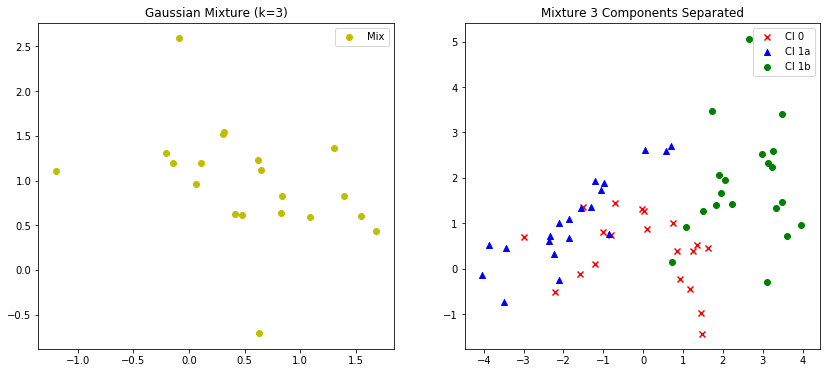

In [37]:
# Mixture Density of 3 component Gaussian
# [Class0 * (1/2) + Class1A * (1/6) + Class1B * (1/3)] 
y = np.array(y0)*(1/2) + np.array(y1a)*(1/6) + np.array(y1b)*(1/3)
x = np.array(x0)*(1/2) + np.array(x1a)*(1/6) + np.array(x1b)*(1/3)
z = np.zeros([n_inpoints, 3])
zidx = np.zeros([n_inpoints, 1])
for i in np.arange(y.size):
    idxmax = np.argmax([y0[i], y1a[i], y1b[i]])
    zidx[i] = idxmax
    z[i][idxmax] = 1
    print([i, idxmax, y0[i], y1a[i], y1b[i], z[i]])

# Subplots 
f, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))
ax1.scatter(x, y, color = 'y',marker='o', label = 'Mix')
ax1.set_title('Gaussian Mixture (k=3)')
ax1.legend()
ax2.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
ax2.scatter(x1a, y1a, color = 'b',marker='^', label = 'Cl 1a')
ax2.scatter(x1b, y1b, color = 'g',marker='o', label = 'Cl 1b')
ax2.set_title('Mixture 3 Components Separated')
ax2.legend()                
# Fine-tune figure
f.subplots_adjust()

In [ ]:
# ----------------------------------------
# Set up the [xi, yi] training data vector
# ----------------------------------------
X = np.vstack((x, y)).T
Z = z
print("Data X Shape:",X.shape)

X1, X2 = np.meshgrid(X[:,0], X[:,1])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, zidx)
ax.set_title('Visualize the cluster')
plt.show()


### KMEANS

##### With values of K = 2, 3, 4, 5. For each K, start with several different random initializations, 
##### and choose the run that leads to the smallest mean squared error. 

#### E-STEP
We will evaluate the expectation of the below equation for the current estimate of the parameter,

- $ log p(x_{i}, z_{i} | \theta) = \sum_{k=1}^{K} z_{i} [k] (log N (x_{i} | m_{k}, C_{k}) + log \pi_{k})$
- $ E[log p(x_{i}, z_{i} | \theta) | \theta^l ] = \sum_{k=1}^{K} p(k|x_{i}) (log N (x_{i} | m_{k}, C_{k}) + log \pi_{k})$

Note that $ \theta = \{ pi_{k}, m_{k}, C_{k} \}_{k=1}^{K} $ in the above is to be optimized over to get the next estimate $ \theta^{l+1} $ in the M-step, and $ p(k|x_{i}) $ are numerical values that we computed using the current estimate
$ \theta^{l} $  in the E-step

#### M-STEP



Mu   : [[-0.21373479  0.58419642]
 [ 0.70155719  0.80882767]
 [ 1.05622148  1.13937171]
 [ 0.32029843  0.75698003]
 [ 1.23662831  0.2020348 ]]
Si   : [array([[ 0.31295557, -0.0047269 ],
       [-0.0047269 ,  0.29457763]]), array([[0.46173819, 0.11236928],
       [0.11236928, 0.30491585]]), array([[0.71778374, 0.10323723],
       [0.10323723, 0.39995925]]), array([[0.51172763, 0.06181255],
       [0.06181255, 0.43927923]]), array([[1., 0.],
       [0., 1.]])]
W    : [0.09818459245051689, 0.2370349892338578, 0.2353598699865137, 0.2592629137097491, 0.2]
LogL : [-183.4793772830588, 19.474091721790973, 20.122872386279436, -2.7755575615628917e-15, 9.992007221626403e-16]
Iter : 5


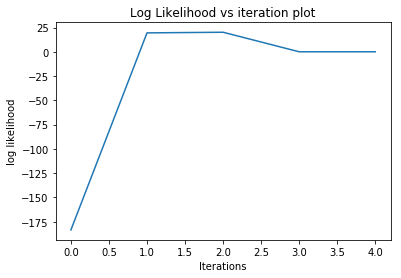

In [23]:
# Initialization 
K = 2
Pik= [0.4, 0.4, 0.2]
Mk = [(0, 0), (-2, 1), (3, 2)]
Ck = [np.array([[2.0, 0.5], [0.5, 0.0]]),
      np.array([[1.0, 0.5], [0.5, 1.0]]),
      np.array([[1.5, 1.0], [1.0, 1.5]])]


def fit_EM(X, max_iters = 1000, k=2, eps=0.000001):
    # n = number of data-points, d = dimension of data points        
    n, d = X.shape

    # randomly choose the starting centroids/means 
    ## as 3 of the points from datasets        
    mu = X[np.random.choice(n, k, False), :]

    # initialize the covariance matrices for each gaussians
    Sigma= [np.eye(d)] * k

    # initialize the probabilities/weights for each gaussians
    w = [1./k] * k

    # responsibility matrix is initialized to all zeros
    # we have responsibility for each of n points for eack of k gaussians
    R = np.zeros((n, k))

    ### log_likelihoods
    log_likelihoods = []

    P = lambda mu, s: np.linalg.det(s) ** -.5 ** (2 * np.pi) ** (-X.shape[1]/2.) \
            * np.exp(-.5 * np.einsum('ij, ij -> i',\
                    X - mu, np.dot(np.linalg.inv(s) , (X - mu).T).T ) ) 
    
    # Iterate till max_iters iterations        
    while len(log_likelihoods) < max_iters:

        # E - Step

        ## Vectorized implementation of e-step equation to calculate the 
        ## membership for each of k -gaussians
        for k in range(k):
            R[:, k] = w[k] * P(mu[k], Sigma[k])

        ### Likelihood computation
        log_likelihood = np.sum(np.log(np.sum(R, axis = 1)))

        log_likelihoods.append(log_likelihood)

        ## Normalize so that the responsibility matrix is row stochastic
        R = (R.T / np.sum(R, axis = 1)).T

        ## The number of datapoints belonging to each gaussian            
        N_ks = np.sum(R, axis = 0)


        # M Step
        ## calculate the new mean and covariance for each gaussian by 
        ## utilizing the new responsibilities
        for k in range(k):

            ## means
            mu[k] = 1. / N_ks[k] * np.sum(R[:, k] * X.T, axis = 1).T
            x_mu = np.matrix(X - mu[k])

            ## covariances
            Sigma[k] = np.array(1 / N_ks[k] * np.dot(np.multiply(x_mu.T,  R[:, k]), x_mu))

            ## and finally the probabilities
            w[k] = 1. / n * N_ks[k]
        # check for onvergence
        if len(log_likelihoods) < 2 : continue
        if np.abs(log_likelihood - log_likelihoods[-2]) < eps: break

    
    ## bind all results together
    from collections import namedtuple
    params = namedtuple('params', ['mu', 'Sigma', 'w', 'log_likelihoods', 'num_iters'])
    params.mu = mu
    params.Sigma = Sigma
    params.w = w
    params.log_likelihoods = log_likelihoods
    params.num_iters = len(log_likelihoods)   
    return params

params = fit_EM(X, max_iters= 100, k= 5)
print('Mu   :',params.mu)
print('Si   :',params.Sigma)
print('W    :',params.w)
print('LogL :',params.log_likelihoods)
print('Iter :',params.num_iters)
plt.plot(params.log_likelihoods)
plt.title('Log Likelihood vs iteration plot')
plt.xlabel('Iterations')
plt.ylabel('log likelihood')
plt.show()

##### With Normalization

### Results